In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('data/wtbdata_245days.csv')
df_loc = pd.read_csv('data/sdwpf_baidukddcup2022_turb_location.csv')

In [3]:
df

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.00,1.00,1.00,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.00,1.00,1.00,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.00,1.00,1.00,-0.23,509.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727515,134,245,23:10,7.79,2.80,-0.07,3.95,216.51,6.03,6.03,6.03,-111.69,601.44
4727516,134,245,23:20,8.06,4.39,0.23,3.94,216.51,5.81,5.81,5.81,-72.67,673.79
4727517,134,245,23:30,8.08,2.28,-0.16,4.15,216.51,0.68,0.68,0.68,-118.70,999.36
4727518,134,245,23:40,8.46,0.80,-0.14,4.32,216.51,0.02,0.02,0.02,-58.12,1100.89


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# libraries & dataset
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False 
sns.set(style="darkgrid")

def plot_windTurb(data,choose_params,col_names,sort_cols,show_range):
    '''
    choose_params:数据筛选的数据['TurbID', 'Day', 'Tmstamp']
    col_names:需要画的列['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']
    sort_cols:按什么列排序['TurbID', 'Day', 'Tmstamp']
    show_range:展示范围 [144*200,144*202]
    '''
    if choose_params is None:pass
    else:
        choose_str = ""
        for key,value in choose_params.items():
            choose_str += key+f"=={value}" if choose_str=="" else " and "+key+f"=={value}"
        data_choose = data.query(choose_str).reset_index(drop=True)
    if sort_cols is None:pass
    else:pass

    lenth = data_choose.shape[0]
    if len(show_range)==2:
        range_choose = range(show_range[0],show_range[1])
        data_choose = data_choose.iloc[show_range[0]:show_range[1],:]
    else:range_choose = range(lenth) 
    plt.figure(figsize=(24,10))
    for col in col_names:
        plt.plot(range_choose, data_choose[col],label=col)
    plt.xlabel('time')
    plt.ylabel('value')
    plt.legend(fontsize=16)  # 展示图例legend
    plt.show()
        

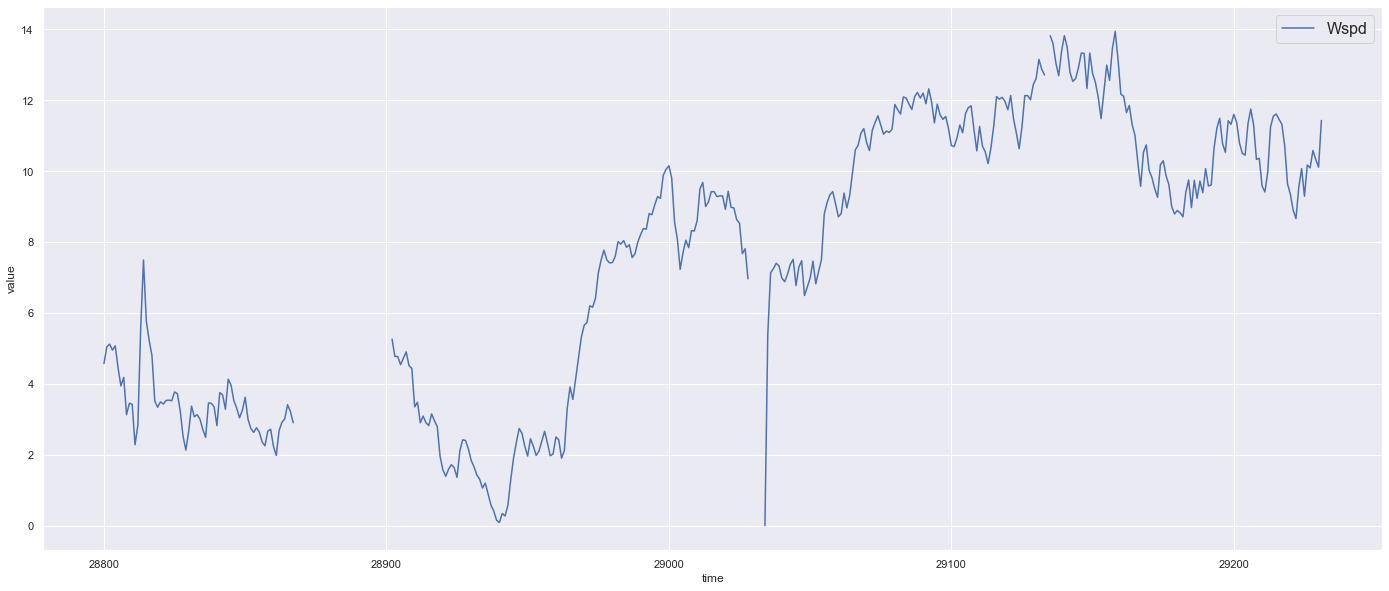

In [5]:
choose_params = {
    "TurbID":1
}
col_names = ["Wspd"]#["Prtv","Patv"]
plot_windTurb(df,choose_params,col_names,None,[144*200,144*203])